# Project: Wrangling and Analyze Data

## WeRateDogs® Tweet Dataset Report

### Table of contents

* [Introduction](#introduction)
* [About the Dataset](#about)
* [Insights](#insights)
* [Conclusions](#conclusions)

In [1]:
import urllib
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
%matplotlib inline

data_dir = Path("data")

In [2]:
twitter_archive_master_df = pd.read_csv(data_dir / "twitter_archive_master.csv")

### Introduction<a class="anchor" id="introduction"></a>|

The prupose of this document is to present a few insights about the [WeRateDogs®](https://twitter.com/dog_rates) tweet dataset, in the context of the "Wrangling and Analyze Data" project of Udacity's Data Analyst Nanodegree.

### About the Dataset<a class="anchor" id="about"></a>

The dataset consists of tweets from the popular [@dog_rates](https://twitter.com/dog_rates) twitter account from November 2015 until August 2017 augmented with AI powered dog breed predictions. Each dog is "rated" on a scale of 1 to 10, but quite often (as we'll see), the actual rating goes over the maximum (11/10, 12/10, etc.). For the purpose of the analysis we've converted these fractions into a float number. Aditionally, each dog can be placed in one of the following stages: *doggo*, *pupper*, *puppo* and *fluffer*.

### Insights<a class="anchor" id="insights"></a>

One of the most peculiar aspects of this account, is its rating system. How often do they go over the maximum rating of 10?

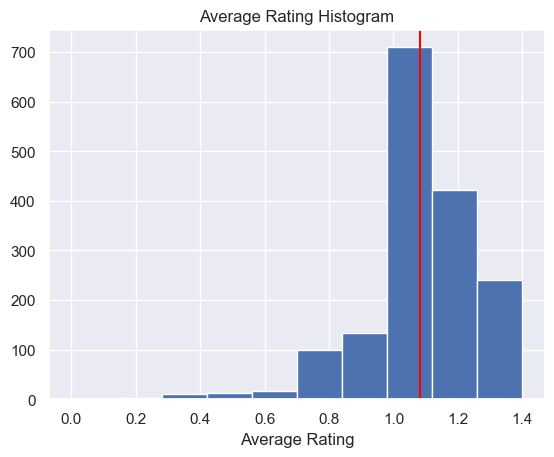

In [3]:
plt.hist(twitter_archive_master_df.rating);
plt.xlabel('Average Rating')
plt.title('Average Rating Histogram')
plt.axvline(twitter_archive_master_df.rating.mean(), color="red");

As we can see, on average they go over the limit (1.0 in our converted rating). Although some users [have complained](https://knowyourmeme.com/memes/theyre-good-dogs-brent) about this, we think this is quite accurate as [all doggos are good doggos](https://www.reddit.com/r/memes/comments/p5d3px/all_doggos_are_good_doggos/).

Does this rating influence the reach of the tweets? Let's check the relation between the rating and the number of retweets:

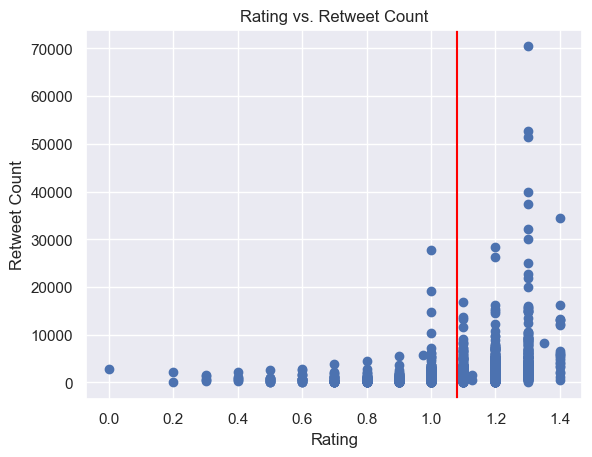

In [4]:
plt.scatter(
    twitter_archive_master_df.rating,
    twitter_archive_master_df.retweet_count
);
plt.xlabel('Rating');
plt.ylabel('Retweet Count');
plt.title('Rating vs. Retweet Count');
plt.axvline(twitter_archive_master_df.rating.mean(), color="red");

In [5]:
print(f"Correlation Factor: {np.round(twitter_archive_master_df.rating.corr(twitter_archive_master_df.retweet_count), 2)}")

Correlation Factor: 0.31


Although it seems that there is some correlation between the rating and the retweet count, the correlation factor is quite low.

How about the breeds? Which ones are the most *puppolar*?

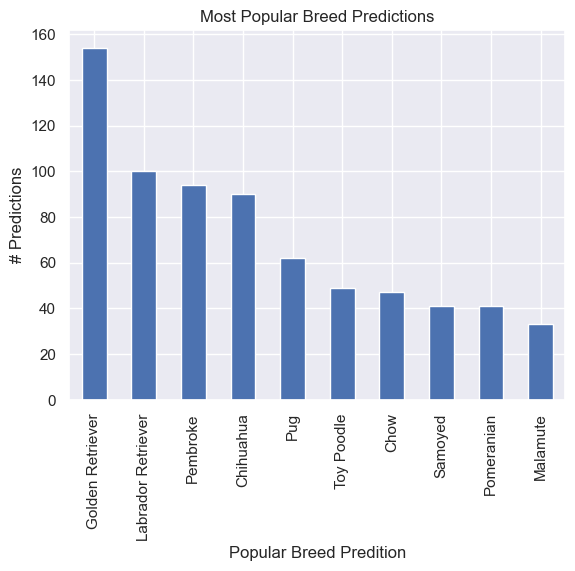

In [6]:
twitter_archive_master_df.prediction.value_counts()[:10].plot(kind="bar");
plt.xlabel('Popular Breed Predition');
plt.ylabel('# Predictions');
plt.title('Most Popular Breed Predictions');

Why would Golden Retrievers be so popular? These images speak for themselves:

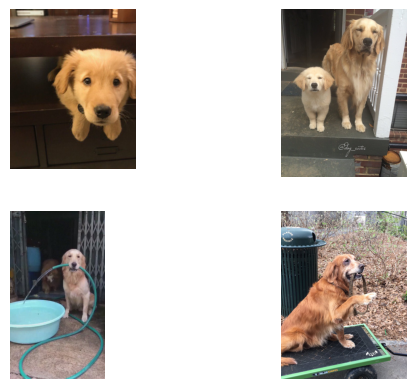

In [7]:
urls = twitter_archive_master_df[twitter_archive_master_df.prediction == "Golden Retriever"].sort_values("favorite_count", ascending=False).jpg_url[:4]
images = [
    plt.imread(urllib.request.urlopen(url), format="jpg")
    for url in urls
]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True) ;
ax1.imshow(images[0]);
ax1.axis('off');
ax2.imshow(images[1]);
ax2.axis('off');
ax3.imshow(images[2]);
ax3.axis('off');
ax4.imshow(images[3]);
ax4.axis('off');

How about *doggos*, *puppers*, *puppos* and *fluffers*? What is the *good-set* of stages?

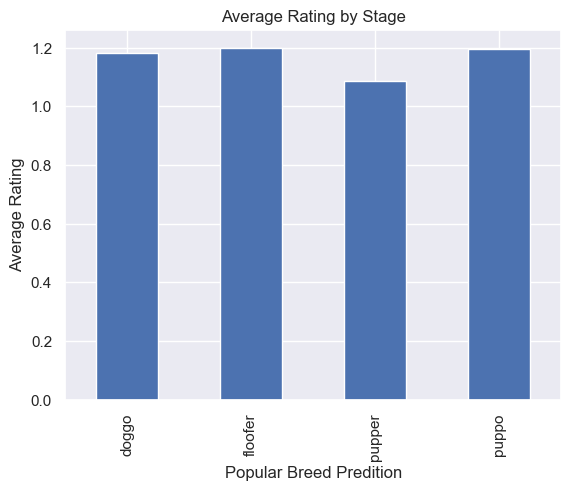

In [8]:
twitter_archive_master_df.groupby("stage").rating.mean().plot(kind="bar");
plt.xlabel("Popular Breed Predition");
plt.ylabel("Average Rating");
plt.title("Average Rating by Stage");

As you can see, the're all equally good they're all better than 10/10 (on average).

### Conclusions<a class="anchor" id="conclusions"></a>

We've only scrapped the surface of this *pawesome* dataset. There are quite a few questions we could have tried to answer:

* Is the rating biased towards certain breeds?
* Which breeds are the *floofer-est*?
* Is a 16/10 score possible?

And many, many more. We encourge you to fetch this dataset, explore it to answer these questions and hone your data analysis skills. 